In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score
import nltk
import string
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
df=pd.read_csv("/content/drive/MyDrive/Codsoft/spam.csv",encoding='ISO-8859-1')

In [48]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2167,ham,Yes.he have good crickiting mind,NaN,NaN,NaN
4323,ham,I am not having her number sir,NaN,NaN,NaN
3371,ham,And now electricity just went out fml.,NaN,NaN,NaN
5523,ham,Going to join tomorrow.,NaN,NaN,NaN
2048,ham,So dont use hook up any how,NaN,NaN,NaN


In [49]:
df=df.iloc[:,0:2]

In [50]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [51]:
column_to_replace={'v1':'label', 'v2':'text'}

In [52]:
df.rename(columns=column_to_replace,inplace=True)

<ipython-input-52-ec71785e0593>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=column_to_replace,inplace=True)


In [53]:
df.sample(5)

,label,text
1599,ham,"Yeah probably, I still gotta check out with leo"
5508,ham,"Machan you go to gym tomorrow, i wil come lat..."
4117,ham,Watch lor. I saw a few swatch one i thk quite ...
640,ham,Well imma definitely need to restock before th...
340,ham,Ok that's great thanx a lot.


In [54]:
df['label'].value_counts()*100/df.shape[0]

ham     86.593683
spam    13.406317
Name: label, dtype: float64

In [55]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

# Data Cleaning

In [56]:
encoder=LabelEncoder()

In [57]:
df['label']=encoder.fit_transform(df['label'])

<ipython-input-57-f59e39943590>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label']=encoder.fit_transform(df['label'])


In [58]:
df.sample(5)

,label,text
4578,0,No plans yet. What are you doing ?
2354,0,R we going with the &lt;#&gt; bus?
678,0,Cause I'm not freaky lol
2481,0,K.:)do it at evening da:)urgent:)
5554,0,Well keep in mind I've only got enough gas for...


In [59]:
df.duplicated().sum()

403

In [60]:
df=df.drop_duplicates(keep='first')

In [61]:
df.shape

(5169, 2)

In [62]:
df.duplicated().sum()

0

In [63]:
df['label'].value_counts()

0    4516
1     653
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

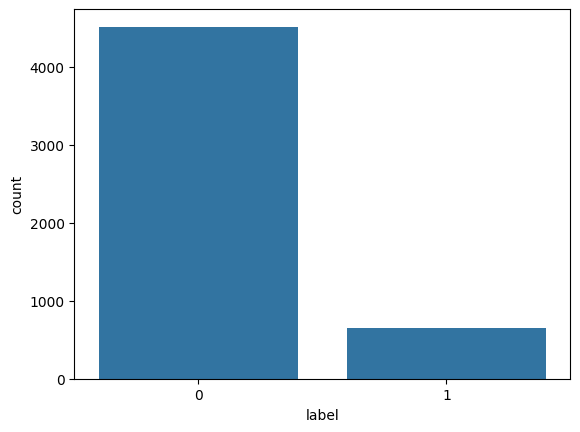

In [64]:
sns.countplot(x='label',data=df)

In [65]:
df['number_characters']=df['text'].apply(lambda x:len(x))

In [66]:
df['number_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [67]:
df['number_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [68]:
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [69]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [77]:
df['transformed_text'] = df['text'].apply(transform_text)

In [70]:
df

,label,text,number_characters,number_words,number_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [71]:
df[df['label']==0][['number_characters','number_words','number_sentence']].describe()

,number_characters,number_words,number_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [72]:
df[df['label']==1][['number_characters','number_words','number_sentence']].describe()

,number_characters,number_words,number_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='number_characters', ylabel='Count'>

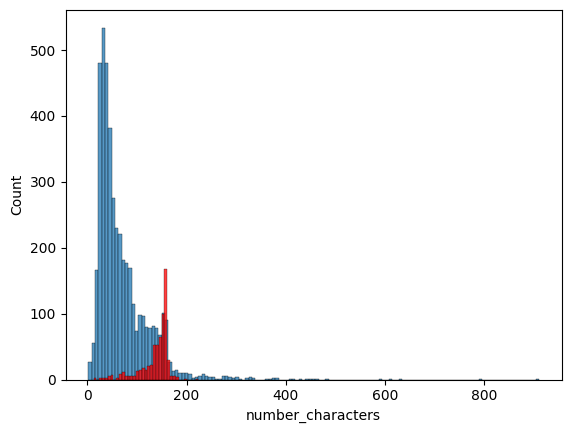

In [73]:
plt.figure()
sns.histplot(data=df[df['label']==0],x='number_characters')
sns.histplot(data=df[df['label']==1],x='number_characters',color='red')

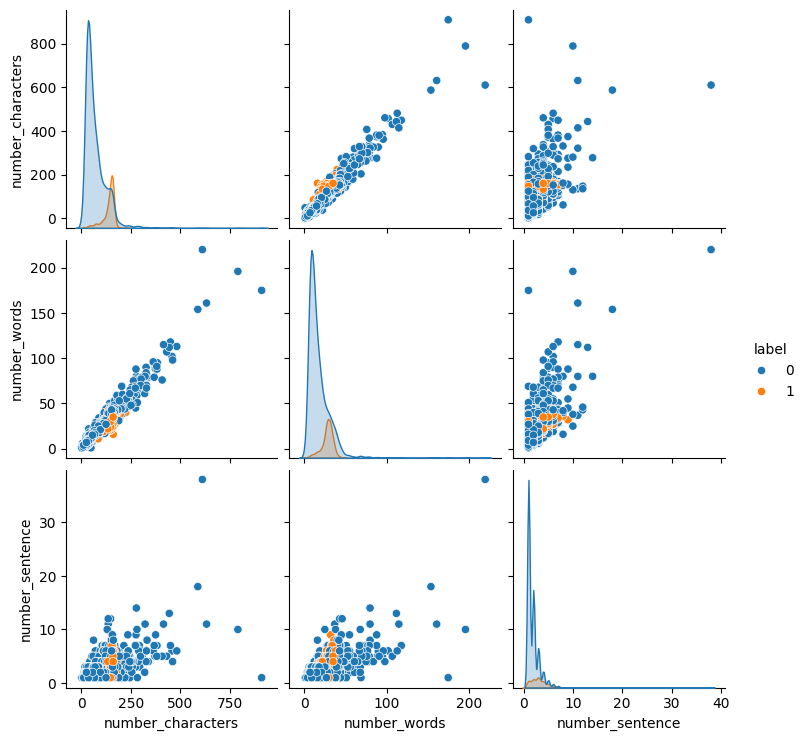

In [74]:
sns.pairplot(df,hue='label')

# Data Preprocessing

In [98]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [99]:
df['vectorized']=df['text'].apply(lambda x:nlp(x).vector)

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [102]:
scaler=MinMaxScaler()

In [103]:
word_vectors=np.vstack(df['vectorized'])

In [104]:
x_train,x_test,y_train,y_test=train_test_split(scaler.fit_transform(np.vstack(df['vectorized'])),df['label'],test_size=0.2,random_state=43)

In [88]:
mnb=MultinomialNB()
gb=GaussianNB()
lrc=LogisticRegression()
dtc=DecisionTreeClassifier(max_depth=5)
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
svc=SVC(kernel='sigmoid',gamma=1.0)
xgb=XGBClassifier()

In [89]:
mnb=MultinomialNB()
gb=GaussianNB()
lrc=LogisticRegression()
dtc=DecisionTreeClassifier(max_depth=5)
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
svc=SVC(kernel='sigmoid',gamma=1.0)
xgb=XGBClassifier()

In [90]:
clfs={'mnb':mnb,'gb':gb,'lrc':lrc,'dtc':dtc,'rfc':rfc,'svc':svc,'xgb':xgb}

In [91]:
def prediction_scoring(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [105]:
result_list=[]
for key,value in clfs.items():
    result_list.append(prediction_scoring(clfs[key],x_train,x_test,y_train,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division

In [106]:
result_list

[(0.8655705996131529, 0.0),
 (0.8829787234042553, 0.5428571428571428),
 (0.9535783365570599, 0.9099099099099099),
 (0.9003868471953579, 0.6636363636363637),
 (0.9448742746615088, 0.9880952380952381),
 (0.8655705996131529, 0.0),
 (0.9680851063829787, 0.9491525423728814)]

In [107]:
result_dataframe=pd.DataFrame(result_list,columns=['accuracy','precision'])

In [108]:
result_dataframe

,accuracy,precision
0,0.865571,0.000000
1,0.882979,0.542857
2,0.953578,0.909910
3,0.900387,0.663636
4,0.944874,0.988095
5,0.865571,0.000000
6,0.968085,0.949153


In [109]:
result_dataframe.insert(0,'classifiers',clfs.keys())

In [110]:
result_dataframe

,classifiers,accuracy,precision
0,mnb,0.865571,0.000000
1,gb,0.882979,0.542857
2,lrc,0.953578,0.909910
3,dtc,0.900387,0.663636
4,rfc,0.944874,0.988095
5,svc,0.865571,0.000000
6,xgb,0.968085,0.949153


In [111]:
result_dataframe.loc[result_dataframe['precision'].sort_values(ascending=False).index]

,classifiers,accuracy,precision
4,rfc,0.944874,0.988095
6,xgb,0.968085,0.949153
2,lrc,0.953578,0.909910
3,dtc,0.900387,0.663636
1,gb,0.882979,0.542857
0,mnb,0.865571,0.000000
5,svc,0.865571,0.000000


In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()

In [113]:
tf_idf_vectors=vectorizer.fit_transform(df['text'])

In [114]:
tf_idf_vectors.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [115]:
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(scaler.fit_transform(tf_idf_vectors.toarray()),df['label'],test_size=0.2,random_state=43)

In [116]:
result_list=[]
for key,value in clfs.items():
    result_list.append(prediction_scoring(clfs[key],x_train_1,x_test_1,y_train_1,y_test_1))

In [117]:
result_dataframe_tf_idf=pd.DataFrame(result_list,columns=['accuracy','precision'])

In [118]:
result_dataframe_tf_idf.insert(0,'classifiers',clfs.keys())

In [119]:
result_dataframe_tf_idf.loc[result_dataframe_tf_idf['precision'].sort_values(ascending=False).index]

,classifiers,accuracy,precision
2,lrc,0.969052,1.000000
4,rfc,0.970019,0.973684
6,xgb,0.969052,0.942149
5,svc,0.968085,0.920635
0,mnb,0.973888,0.894366
3,dtc,0.928433,0.882353
1,gb,0.899420,0.577093
